<b>Note</b>: This guide is only for reference.<br>
A more detailed guide, which should be used is described at the official darknet repository:<br>
https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
Updating files:  92% (1863/2023)
Updating files:  93% (1882/2023)
Updating files:  94% (1902/2023)
Updating files:  95% (1922/2023)
Updating files:  96% (1943/2023)
Updating files:  97% (1963/2023)
Updating files:  98% (1983/2023)
Updating files:  99% (2003/2023)
Updating files: 100% (2023/2023)
Updating files: 100% (2023/2023), done.


In [1]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/home/jupyter/src/darknet


In [2]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Thu_Jun_11_22:26:38_PDT_2020
Cuda compilation tools, release 11.0, V11.0.194
Build cuda_11.0_bu.TC445_37.28540450_0


In [ ]:
!wget -O opencv.zip https://github.com/opencv/opencv/archive/master.zip
!unzip opencv.zip
!mkdir -p build && cd build
!cmake  opencv-master
!cmake --build .

In [5]:
!sudo apt-file search opencv.pc

libopencv-dev: /usr/lib/x86_64-linux-gnu/pkgconfig/opencv.pc


In [4]:
!export PKG_CONFIG_PATH=/usr/lib/pkgconfig:/usr/lib/arm-linux-gnueabi/pkgconfig:/usr/lib/x86_64-linux-gnu/pkgconfig/opencv

In [2]:
!sudo apt-get install libopencv-dev -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  autoconf automake autotools-dev gdal-data gfortran gfortran-8 i965-va-driver
  ibverbs-providers intel-media-va-driver javascript-common libaacs0 libaom0
  libarmadillo9 libarpack2 libavcodec-dev libavcodec58 libavformat-dev
  libavformat58 libavresample-dev libavresample4 libavutil-dev libavutil56
  libbdplus0 libbluray2 libcaf-openmpi-3 libcharls2 libchromaprint1
  libcoarrays-dev libcoarrays-openmpi-dev libcodec2-0.8.1 libcrystalhd3
  libdap25 libdapclient6v5 libdapserver7v5 libdc1394-22 libdc1394-22-dev
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libepsilon1 libevent-core-2.1-6 libevent-pthreads-2.1-6 libexif-dev
  libexif-doc libexif12 libfabric1 libfreexl1 libfyba0 libgdal20 libgdcm2-dev
  libgdcm2.8 libgeos-3.7.1 libgeos-c1v5 libgeotiff2 libgfortran-8-dev libgl1
  libgl1-mesa-dri libgl2ps1

In [6]:
%cd darknet

/home/jupyter/src/darknet


In [7]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [9]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip test.zip -d darknet/data/
!unzip obj.zip -d darknet/data/

Archive:  obj.zip
  inflating: data/obj/0000a1b2fba255e9.jpg  
  inflating: data/obj/0000a1b2fba255e9.txt  
  inflating: data/obj/0000c33c6f4b8518.jpg  
  inflating: data/obj/0000c33c6f4b8518.txt  
  inflating: data/obj/0000f509689e349c.jpg  
  inflating: data/obj/0000f509689e349c.txt  
  inflating: data/obj/0000f53faa4d14c3.jpg  
  inflating: data/obj/0000f53faa4d14c3.txt  
  inflating: data/obj/00075905539074f2.jpg  
  inflating: data/obj/00075905539074f2.txt  
  inflating: data/obj/0007cebe1b2ba653.jpg  
  inflating: data/obj/0007cebe1b2ba653.txt  
  inflating: data/obj/000a045a0715d64d.jpg  
  inflating: data/obj/000a045a0715d64d.txt  
  inflating: data/obj/000a1249af2bc5f0.jpg  
  inflating: data/obj/000a1249af2bc5f0.txt  
  inflating: data/obj/000a9c68eee799f0.jpg  
  inflating: data/obj/000a9c68eee799f0.txt  
  inflating: data/obj/000aabd8888cfde7.jpg  
  inflating: data/obj/000aabd8888cfde7.txt  
  inflating: data/obj/000abc075d659122.jpg  
  inflating: data/obj/000abc075d65912

In [13]:
!cp yolov4-tiny-custom.cfg darknet/cfg

In [14]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp obj.names darknet/data/
!cp obj.data  darknet/data/

In [23]:
!cp generate_train.py darknet/
!cp generate_test.py  darknet/
!cp yolov4-tiny.conv.29  darknet/
!cp yolov4-tiny.weights  darknet/

In [28]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/home/jupyter/src/darknet


In [10]:
!python generate_train.py
!python generate_test.py

In [11]:
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco.names  goal.txt		      obj		scream.jpg
coco9k.map  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map

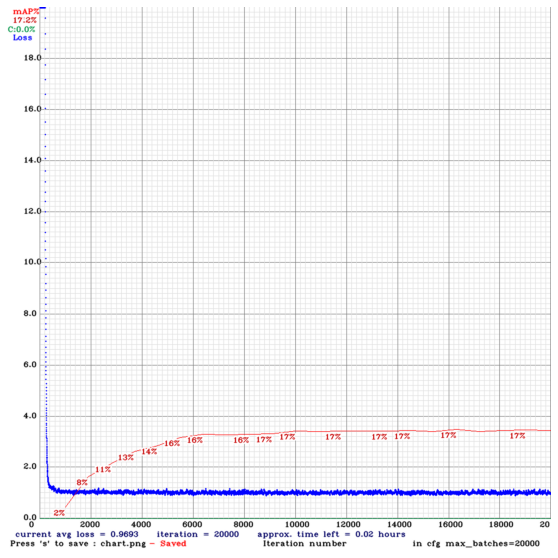

In [17]:
# show chart.png of how custom object detector did with training
imShow('chart.png')